# Import Librabry 

In [0]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style="darkgrid")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from scipy.optimize import nnls
from scipy import stats

import requests 

#Plot Functions

Plot SMA and Price

In [0]:
def plot_price_SMA(_TICKER,N):
    """
        Plot the Price of Ticker and its Simple Moving Average 
        
        Parameters
        ----------
        _TICKER : str
            The ticker ID 
        N       : int
            The window sizes of rolling simple moving average

        Returns
        -------
        None
    """

    fig = plt.figure(figsize=(19, 7))
    ax = fig.add_subplot(111)

    temp = pd.DataFrame({ 'Date' : daily_close_px.index.values,
                          'Tickers' : daily_close_px[_TICKER],
                          'Simple Moving Average' :daily_close_px[_TICKER].rolling(N).mean()})

    sns.lineplot(x='Date',y='value', hue='variable', data=pd.melt(temp, ['Date']) ) 
    plt.ylabel('Vietnam Thousand Dong')
    plt.legend(['Closing Prices','Simple Moving Averages'])
    plt.xticks(rotation=60)
    plt.title(' Closing prices and Simple Moving Average of {} '.format(_TICKER))
    plt.show()
    return 

RSI 

In [0]:
def RSI(price, N=30):
    """
        Calculate the Relative Strenght Index of ticker 
        
        Parameters
        ----------
        price   :  pandas.series 
            The closing price array 
        N       : int
            The  sizes of rolling window Relative Strength Index

        Returns
        -------
        rsi     : numpy.array 
            The array contain Relative Strength Index path
    """

    delta = price.diff()

    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0

    RolUp = dUp.rolling(N).mean()
    RolDown = dDown.rolling(N).mean().abs()

    RS = RolUp / RolDown

    rsi= 100.0 - (100.0 / (1.0 + RS))
    return rsi

Plot RSI and Prices

In [0]:
def plot_price_RSI(_TICKER,N):
    """
        Plot the Price of Ticker and its Relative Strenght Index
        
        Parameters
        ----------
        _TICKER : str
            The ticker ID 
        N.      : int
            The  sizes of rolling window Relative Strenght Index

        Returns
        -------
        None
    """

    fig = plt.figure(figsize=(19, 7))
    ax = fig.add_subplot(111)

    temp = pd.DataFrame({ 'Date' : daily_close_px.index.values,
                        'Tickers' : daily_close_px[_TICKER] })

    sns.lineplot(x='Date',y='value', hue='variable', data=pd.melt(temp, ['Date']) ) # , style="event")


    plt.ylabel('Vietnam Thousand Dong')
    plt.legend(['Closing Prices'])
    plt.xticks(rotation=60)
    plt.title(' Closing prices of {} '.format(_TICKER))

    fig = plt.figure(figsize=(19, 3))
    ax = fig.add_subplot(111)

    sns.lineplot(data=RSI(daily_close_px[_TICKER],N))
    plt.ylabel('Values')
    plt.xlabel('Date')
    plt.legend(['RSI'])
    plt.xticks(rotation=60)
    plt.title(' Relative Strength Index of {} '.format(_TICKER))

    plt.show()
    return 

Daily Return

In [0]:
def daily_return(price):
    """
        Calculate the daily return of ticker
        
        Parameters
        ----------
        price   :  pandas.series 
            The closing price array 

        Returns
        -------
        r     : numpy.array 
            The array contain daily return path
    """

    price_lag = price.shift(1)
    r = price / price_lag - 1
    return r 

Sharpe ratio

In [0]:
def sharp_ratio(price,N):
    """
        Calculate the Sharpe Ratio path of ticker 
        
        Parameters
        ----------
        price   :  pandas.Series 
            The closing price array 
        N       : int
            The  sizes of rolling window Sharpe Ratio

        Returns
        -------
        sharpe_ratio     : numpy.array 
            The array contain Sharpe Ratio path
    """

    r = daily_return(price)
    rolling_mean = r.rolling(N).mean()
    rolling_var = r.rolling(N).var()
    return rolling_mean / np.sqrt(rolling_var)

In [0]:
def sharp_ratio_portfolio(portfolio_daily_return,n = 1):
    """
        Calculate the Sharpe Ratio of portfolio
        
        Parameters
        ----------
        portfolio_daily_return   : pandas.DataFrame
            The array of portfolio daily return 
        n                        : int
            Anual Factor 
        Returns
        -------
        sharpe_ratio     : float
            Sharpe Ratio value of portfolio
    """
    return_portfolio = portfolio_daily_return.mean(axis=1)
    sharpe_ratio = np.sqrt(n) * return_portfolio.mean() / return_portfolio.std()

    return sharpe_ratio

Plot Sharpe Ratio and Price

In [0]:
def plot_price_sharpe_ratio(_TICKER,N):
    """
        Plot the Price of Ticker and its Relative Strenght Index
        
        Parameters
        ----------
        _TICKER : str
            The ticker ID 
        N       : int
            The  sizes of rolling window Sharpe Ratio

        Returns
        -------
        None
    """
    
    fig = plt.figure(figsize=(19, 7))
    ax = fig.add_subplot(111)

    temp = pd.DataFrame({ 'Date' : daily_close_px.index.values,
                          'Tickers' : daily_close_px[_TICKER]
                          })

  
    sns.lineplot(x='Date',y='value', hue='variable', data=pd.melt(temp, ['Date']) ) # , style="event")
    plt.ylabel('Vietnam Thousand Dong')
    plt.legend(['Closing Prices'])
    plt.xticks(rotation=60)
    plt.title(' Closing prices of {} '.format(_TICKER))
    plt.show()

    fig = plt.figure(figsize=(19, 3))
    ax = fig.add_subplot(111)

    sns.lineplot(data=sharp_ratio(daily_close_px[_TICKER],N))
    plt.ylabel('Values')
    plt.xlabel('Date')
    plt.legend(['Sharp Ratio'])
    plt.xticks(rotation=60)
    plt.title(' Sharp Ratio of {} '.format(_TICKER))

    return 

# Reading Data

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DATA_PATH = 'drive/My Drive/_Project/Entropy 2019/entropy2019_dataset.csv'
df = pd.read_csv(DATA_PATH)

In [11]:
df.head()

,ticker,date,close,volume
0,VN30,2013-01-02,490.82,22641550.0
1,VN30,2013-01-03,491.34,35219262.0
2,VN30,2013-01-04,498.31,21387780.0
3,VN30,2013-01-07,509.18,26031020.0
4,VN30,2013-01-08,525.36,65840432.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533677 entries, 0 to 533676
Data columns (total 4 columns):
ticker    533677 non-null object
date      533677 non-null object
close     533677 non-null float64
volume    533677 non-null float64
dtypes: float64(2), object(2)
memory usage: 16.3+ MB


#Data transformation and cleaning

In [0]:
df['date'] = pd.to_datetime(df['date'],format='%Y/%m/%d')

In [0]:
temp = df.groupby(['ticker','date'])['close'].sum().to_frame('close')
daily_close_px = temp[['close']].reset_index().pivot('date', 'ticker', 'close')

In [15]:
daily_close_px.head()

ticker,AAA,AAM,ABT,ACC,ACL,ADS,AGD,AGF,AGM,AGR,ALP,AMD,ANV,APC,APG,ASIAGF,ASM,ASP,AST,ATA,ATG,AVF,BBC,BCE,BCG,BCI,BFC,BGM,BHN,BHS,BIC,BID,BMC,BMI,BMP,BRC,BSI,BT6,BTP,BTT,...,VHC,VHG,VHM,VIC,VID,VIP,VIS,VJC,VLF,VMD,VN30,VNA,VND,VNE,VNG,VNH,VNI,VNINDEX,VNL,VNM,VNS,VOS,VPB,VPD,VPG,VPH,VPI,VPK,VPS,VRC,VRE,VSC,VSG,VSH,VSI,VST,VTB,VTO,YBM,YEG
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,11.25,22.54,13.44,10.17,NaN,61.0,10.48,13.81,5.21,9.3,NaN,2.88,8.69,NaN,9.44,5.01,3.21,NaN,21.58,NaN,14.66,15.01,3.70,NaN,10.82,NaN,5.36,NaN,8.83,5.41,NaN,28.50,4.49,13.51,6.32,2.87,5.81,3.46,12.15,...,10.83,2.29,NaN,18.74,2.26,3.13,7.46,NaN,16.38,8.60,490.82,10.89,NaN,4.56,5.10,8.5,13.1,418.35,6.81,33.97,8.13,2.4,NaN,NaN,NaN,1.30,NaN,9.99,NaN,3.86,NaN,10.97,6.7,7.28,4.07,2.5,4.14,2.71,NaN,NaN
2013-01-03,NaN,10.98,22.54,13.44,9.84,NaN,64.0,10.96,13.12,5.30,8.9,NaN,2.76,8.52,NaN,9.44,4.90,3.15,NaN,21.58,NaN,14.66,14.65,3.61,NaN,10.75,NaN,5.09,NaN,8.72,5.19,NaN,27.60,4.54,13.79,6.38,3.01,5.81,3.52,11.75,...,10.99,2.35,NaN,18.74,2.18,3.13,7.11,NaN,16.38,8.18,491.34,10.89,NaN,4.35,5.28,8.5,13.1,419.27,6.81,33.78,8.32,2.5,NaN,NaN,NaN,1.24,NaN,9.53,NaN,3.94,NaN,10.93,6.7,7.28,3.96,2.4,4.09,2.65,NaN,NaN
2013-01-04,NaN,10.98,22.44,13.39,9.92,NaN,64.0,10.96,13.18,5.40,9.0,NaN,2.63,8.44,NaN,9.44,4.95,3.15,NaN,21.58,NaN,14.66,15.01,3.52,NaN,10.47,NaN,5.27,NaN,8.94,5.34,NaN,28.14,4.49,13.82,6.32,3.16,5.81,3.68,12.32,...,10.74,2.35,NaN,18.74,2.26,3.08,7.11,NaN,16.38,8.18,498.31,10.89,NaN,4.35,5.28,8.5,13.1,426.06,6.98,34.36,8.29,2.5,NaN,NaN,NaN,1.22,NaN,9.57,NaN,4.01,NaN,11.03,6.7,7.28,3.80,2.5,4.20,2.71,NaN,NaN
2013-01-07,NaN,11.07,22.44,13.34,10.25,NaN,64.0,10.44,13.18,5.49,8.9,NaN,2.60,8.44,NaN,9.44,4.90,3.21,NaN,21.58,NaN,14.66,14.83,3.57,NaN,10.47,NaN,5.09,NaN,8.94,5.27,NaN,27.66,4.66,13.94,6.61,3.08,5.81,3.73,12.84,...,10.37,2.29,NaN,19.56,2.34,3.08,6.94,NaN,16.38,8.48,509.18,10.89,NaN,4.56,5.47,8.5,13.1,434.19,7.03,34.36,7.94,2.5,NaN,NaN,NaN,1.24,NaN,9.49,NaN,4.09,NaN,11.03,6.7,7.64,3.96,2.5,4.20,2.65,NaN,NaN
2013-01-08,NaN,11.44,22.28,13.60,10.57,NaN,61.0,9.96,12.87,5.49,9.2,NaN,2.63,8.44,NaN,9.35,4.95,3.28,NaN,21.58,NaN,14.66,15.36,3.61,NaN,10.47,NaN,5.00,NaN,8.94,5.41,NaN,28.26,4.71,14.62,6.61,3.08,5.81,3.73,13.18,...,10.87,2.22,NaN,19.80,2.42,3.08,7.03,NaN,16.38,8.48,525.36,10.89,NaN,4.56,5.47,8.5,13.1,447.16,6.81,35.93,7.85,2.5,NaN,NaN,NaN,1.24,NaN,9.60,NaN,4.01,NaN,11.13,6.7,7.99,3.96,2.5,4.30,2.65,NaN,NaN


In [16]:
df['ticker'].nunique()

438

In [17]:
daily_close_px.isna().sum() 

ticker
AAA         999
AAM          29
ABT          29
ACC          29
ACL          29
ADS         893
AGD        1503
AGF          29
AGM          29
AGR          29
ALP        1168
AMD         632
ANV          29
APC          29
APG        1002
ASIAGF     1168
ASM          29
ASP          29
AST        1277
ATA         650
ATG         931
AVF        1065
BBC          29
BCE          29
BCG         654
BCI         387
BFC         712
BGM         519
BHN        1037
BHS         474
           ... 
VN30         29
VNA         596
VND        1180
VNE          29
VNG          29
VNH         616
VNI        1094
VNINDEX      29
VNL          29
VNM          29
VNS          29
VOS          29
VPB        1179
VPD        1289
VPG        1287
VPH          29
VPI        1393
VPK          29
VPS         678
VRC          29
VRE        1235
VSC          29
VSG        1587
VSH          29
VSI          29
VST        1088
VTB          29
VTO          29
YBM        1430
YEG        1390
Length: 438, dtyp

We could see that there are a lot missing value on tickers. It coulds be missing on the middles. On last days, or first days. There are some ticker that not available on 2019 ( left HOSE before 2019 ) .


In [18]:
daily_close_px.loc['2019-01-01':].isna().sum()

ticker
AAA          0
AAM          0
ABT          0
ACC          0
ACL          0
ADS          0
AGD        142
AGF          0
AGM          0
AGR          0
ALP        142
AMD          0
ANV          0
APC          0
APG          0
ASIAGF     142
ASM          0
ASP          0
AST          0
ATA        142
ATG          0
AVF        142
BBC          0
BCE          0
BCG          0
BCI        142
BFC          0
BGM        142
BHN          0
BHS        142
          ... 
VN30         0
VNA        142
VND          0
VNE          0
VNG          0
VNH        142
VNI        142
VNINDEX      0
VNL          0
VNM          0
VNS          0
VOS          0
VPB          0
VPD          0
VPG          0
VPH          0
VPI          0
VPK          0
VPS          0
VRC          0
VRE          0
VSC          0
VSG        142
VSH          0
VSI          0
VST        142
VTB          0
VTO          0
YBM          0
YEG          0
Length: 438, dtype: int64

Those missing 142 values is tickers that those not trading in 2019. We could plot to check them again 

In [19]:
drop_cols = daily_close_px.columns[ daily_close_px.loc['2019-01-01':].isna().sum() == 142  ].tolist()
for col in drop_cols: 
    plot_price_SMA(col,30)

Output hidden; open in https://colab.research.google.com to view.

Those are expected behavior. Then we could delete them

In [0]:
daily_close_px = daily_close_px.drop(columns=drop_cols)

 We want to filling the missing value in the middle by linear interpolation. 

In [0]:
daily_close_px = daily_close_px.interpolate()

In [22]:
daily_close_px

ticker,AAA,AAM,ABT,ACC,ACL,ADS,AGF,AGM,AGR,AMD,ANV,APC,APG,ASM,ASP,AST,ATG,BBC,BCE,BCG,BFC,BHN,BIC,BID,BMC,BMI,BMP,BRC,BSI,BTP,BTT,BVH,BWE,C32,C47,CAV,CCI,CCL,CDC,CEE,...,VCB,VCF,VCI,VDP,VDS,VFG,VHC,VHG,VHM,VIC,VID,VIP,VIS,VJC,VMD,VN30,VND,VNE,VNG,VNINDEX,VNL,VNM,VNS,VOS,VPB,VPD,VPG,VPH,VPI,VPK,VPS,VRC,VRE,VSC,VSH,VSI,VTB,VTO,YBM,YEG
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,11.25,22.54,13.44,10.17,NaN,10.48,13.81,5.21,NaN,2.88,8.69,NaN,5.01,3.21,NaN,NaN,15.01,3.70,NaN,NaN,NaN,5.41,NaN,28.50,4.49,13.51,6.32,2.87,3.46,12.15,35.07,NaN,5.65,5.66,NaN,4.70,3.68,3.48,NaN,...,15.36,122.96,NaN,NaN,NaN,11.90,10.83,2.29,NaN,18.74,2.26,3.13,7.46,NaN,8.60,490.82,NaN,4.56,5.10,418.35,6.81,33.97,8.13,2.40,NaN,NaN,NaN,1.30,NaN,9.99,NaN,3.86,NaN,10.97,7.28,4.07,4.14,2.71,NaN,NaN
2013-01-03,NaN,10.98,22.54,13.44,9.84,NaN,10.96,13.12,5.30,NaN,2.76,8.52,NaN,4.90,3.15,NaN,NaN,14.65,3.61,NaN,NaN,NaN,5.19,NaN,27.60,4.54,13.79,6.38,3.01,3.52,11.75,36.81,NaN,5.60,5.41,NaN,4.70,3.87,3.35,NaN,...,15.75,116.81,NaN,NaN,NaN,11.90,10.99,2.35,NaN,18.74,2.18,3.13,7.11,NaN,8.18,491.34,NaN,4.35,5.28,419.27,6.81,33.78,8.32,2.50,NaN,NaN,NaN,1.24,NaN,9.53,NaN,3.94,NaN,10.93,7.28,3.96,4.09,2.65,NaN,NaN
2013-01-04,NaN,10.98,22.44,13.39,9.92,NaN,10.96,13.18,5.40,NaN,2.63,8.44,NaN,4.95,3.15,NaN,NaN,15.01,3.52,NaN,NaN,NaN,5.34,NaN,28.14,4.49,13.82,6.32,3.16,3.68,12.32,38.63,NaN,5.77,5.20,NaN,4.75,4.05,3.35,NaN,...,16.14,121.42,NaN,NaN,NaN,11.90,10.74,2.35,NaN,18.74,2.26,3.08,7.11,NaN,8.18,498.31,NaN,4.35,5.28,426.06,6.98,34.36,8.29,2.50,NaN,NaN,NaN,1.22,NaN,9.57,NaN,4.01,NaN,11.03,7.28,3.80,4.20,2.71,NaN,NaN
2013-01-07,NaN,11.07,22.44,13.34,10.25,NaN,10.44,13.18,5.49,NaN,2.60,8.44,NaN,4.90,3.21,NaN,NaN,14.83,3.57,NaN,NaN,NaN,5.27,NaN,27.66,4.66,13.94,6.61,3.08,3.73,12.84,40.55,NaN,5.85,5.03,NaN,4.70,4.14,3.35,NaN,...,16.58,121.42,NaN,NaN,NaN,11.90,10.37,2.29,NaN,19.56,2.34,3.08,6.94,NaN,8.48,509.18,NaN,4.56,5.47,434.19,7.03,34.36,7.94,2.50,NaN,NaN,NaN,1.24,NaN,9.49,NaN,4.09,NaN,11.03,7.64,3.96,4.20,2.65,NaN,NaN
2013-01-08,NaN,11.44,22.28,13.60,10.57,NaN,9.96,12.87,5.49,NaN,2.63,8.44,NaN,4.95,3.28,NaN,NaN,15.36,3.61,NaN,NaN,NaN,5.41,NaN,28.26,4.71,14.62,6.61,3.08,3.73,13.18,42.55,NaN,5.85,4.99,NaN,4.65,3.96,3.48,NaN,...,17.41,122.96,NaN,NaN,NaN,11.90,10.87,2.22,NaN,19.80,2.42,3.08,7.03,NaN,8.48,525.36,NaN,4.56,5.47,447.16,6.81,35.93,7.85,2.50,NaN,NaN,NaN,1.24,NaN,9.60,NaN,4.01,NaN,11.13,7.99,3.96,4.30,2.65,NaN,NaN
2013-01-09,NaN,11.62,22.17,13.60,10.49,NaN,9.53,12.87,5.49,NaN,2.51,8.36,NaN,4.79,3.35,NaN,NaN,15.98,3.65,NaN,NaN,NaN,5.19,NaN,27.60,4.71,14.90,6.38,2.94,3.57,12.67,40.46,NaN,5.77,4.99,NaN,4.45,3.87,3.41,NaN,...,17.52,122.96,NaN,NaN,NaN,11.90,11.20,2.16,NaN,19.45,2.50,3.04,6.68,NaN,8.30,531.52,NaN,4.42,5.65,448.77,6.81,37.29,7.57,2.40,NaN,NaN,NaN,1.19,NaN,9.45,NaN,3.94,NaN,11.69,7.92,3.85,4.25,2.59,NaN,NaN
2013-01-10,NaN,11.53,22.28,13.76,10.49,NaN,9.29,12.87,5.40,NaN,2.48,8.69,NaN,4.79,3.21,NaN,NaN,16.77,3.70,NaN,NaN,NaN,5.27,NaN,28.20,4.66,15.08,6.66,3.08,3.68,12.96,42.46,NaN,5.77,5.24,NaN,4.45,3.78,3.48,NaN,...,17.96,122.96,NaN,NaN,NaN,11.90,11.20,2.16,NaN,19.45,2.58,3.08,6.68,NaN,8.30,545.80,NaN,4.49,5.65,460.12,6.81,39.05,7.63,2.40,NaN,NaN,NaN,1.16,NaN,9.53,NaN,3.86,NaN,11.78,7.92,3.69,4.36,2.59,NaN,NaN
2013-01-11,NaN,11.53,22.70,14.12,10.49,NaN,9.72,12.36,5.30,NaN,2.57,8.69,NaN,4.84,3.21,NaN,NaN,16.86,3.70,NaN,NaN,NaN,5.19,NaN,29.58,4.66,14.86,6.95,3.08,3.68,13.07,40.90,NaN,5.90,5.03,NaN,4.65,3.87,3.60,NaN,...,17.74,119.12,NaN,NaN,NaN,11.44,11.20,2.16,NaN,19.56,2.50,3.08,6.94,NaN,8.18,545.72,NaN,4.35,5.65,462.69,6.81,40.22,7.79,2.40,NaN,NaN,NaN,1.19,NaN,9.99,NaN,3.86,NaN,12.11,7.78,3.74,4.46,2.59,NaN,NaN
2013-01-14,NaN,11.53,22.49,13.70,10.25,NaN,10.20,12.55,5.40,NaN,2.57,8.60,NaN,4.79,3.28,NaN,NaN,16.77,3.70,NaN,NaN,NaN,5.19,NaN,30.96,4.60,14.74,6.66,3.01,3.73,13.19,38.89,NaN,5.72,5.28,NaN,4.75,3.78,3.60,NaN,...,17.63,121.42,NaN,NaN,NaN,12.02,11.20,2.16,NaN,19.56,2.58,3.08,7.28,NaN,7.88,537.42,

# Section 1

## 1. Data Exploration

### Price path of ticker and SMA 

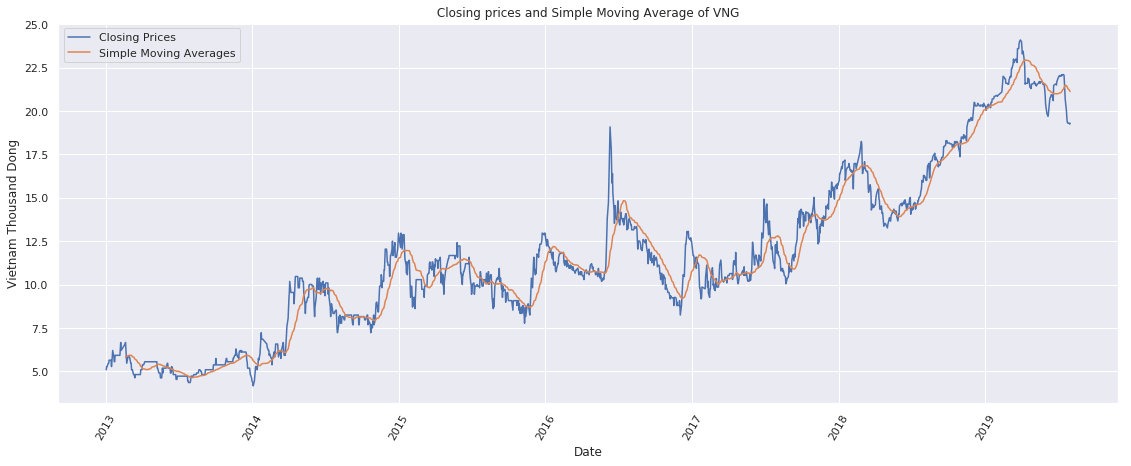

In [23]:
_TICKER = 'VNG'
N = 30

plot_price_SMA(_TICKER,N)

### Price path of VNINDEX and SMA 

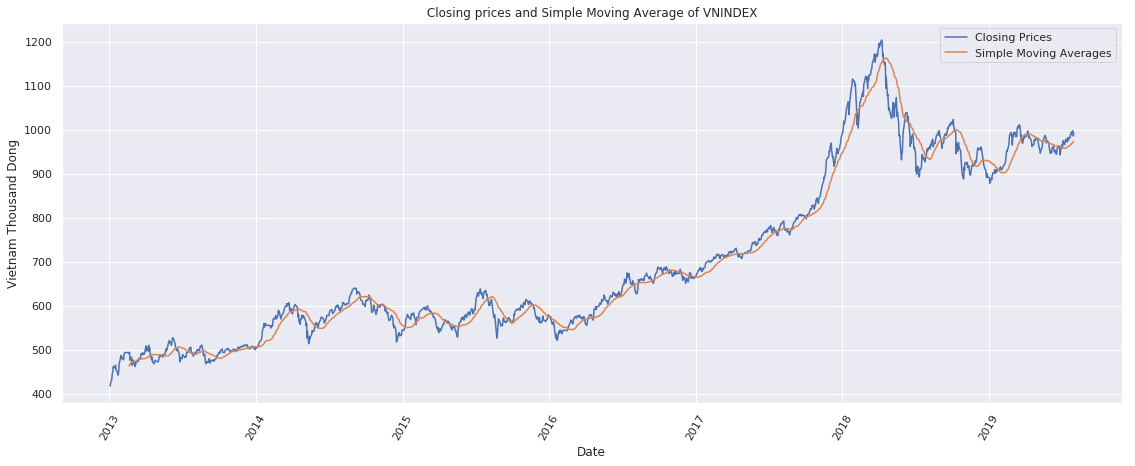

In [24]:
_TICKER = 'VNINDEX'
N = 30

plot_price_SMA(_TICKER,N)

### Price path of ticker and Relative Strength Index 

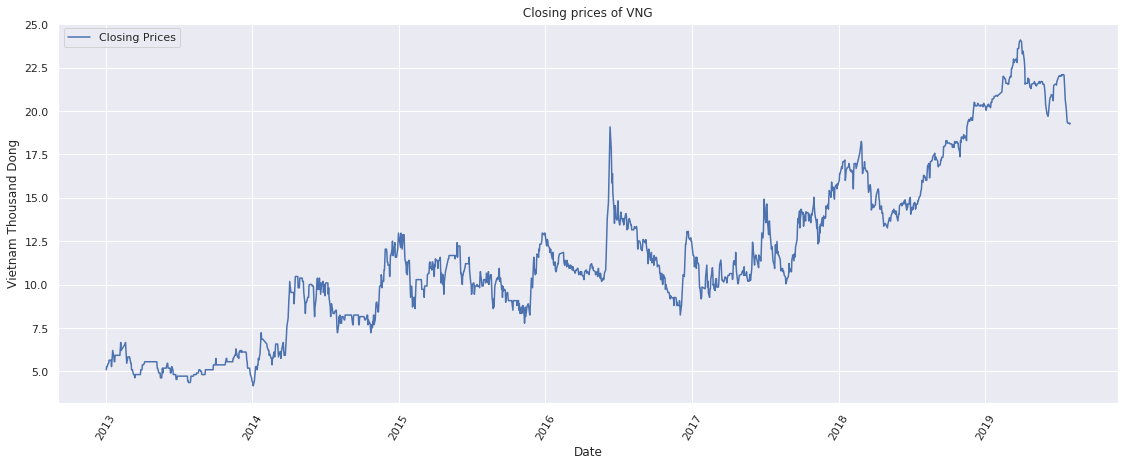

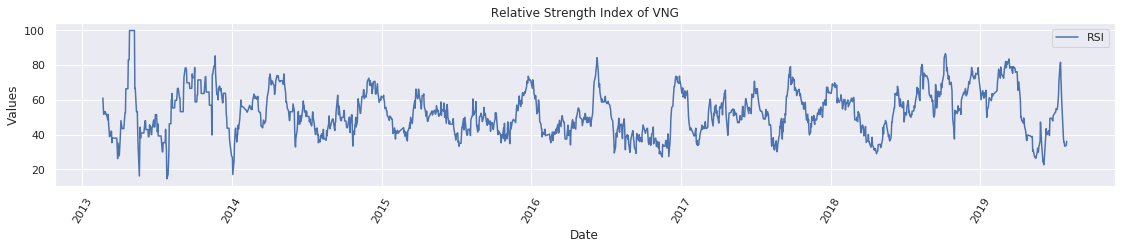

In [25]:
_TICKER = 'VNG'
N = 30

plot_price_RSI(_TICKER,N)

### Price path of ticker and rolling 60 days Sharpe Ratio

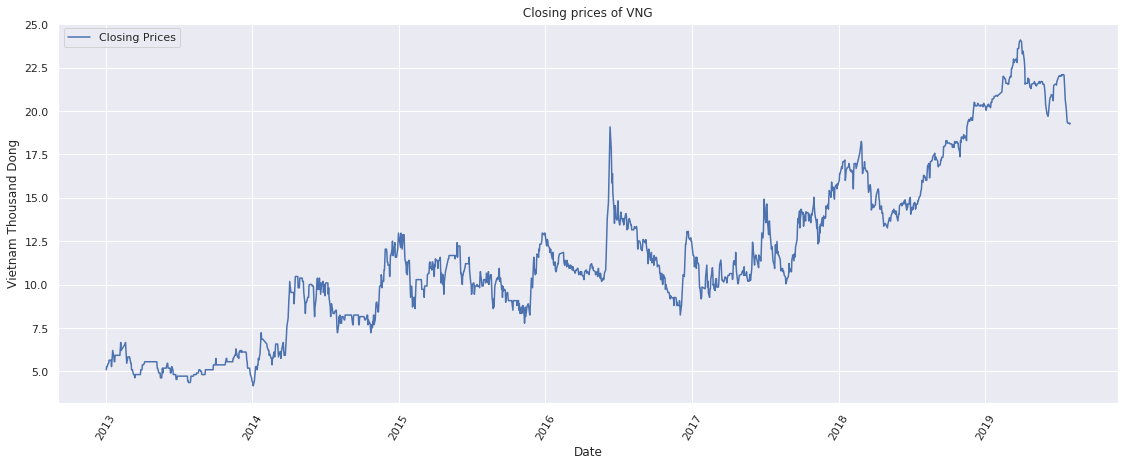

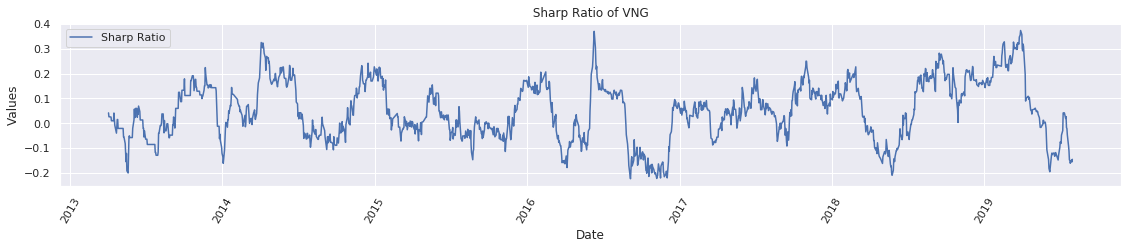

In [26]:
_TICKER = 'VNG'
N = 60

plot_price_sharpe_ratio(_TICKER,N)

### Seasonal Checking 

To checking the seasonal behavior, we could differencing the dataset until it stationary then ploting ACF and PACF. To check if the dataset stationary or not, we using the Augmented Dickey-Fuller test.





*   Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
*   Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit 
root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.



#### Tickers

In [27]:
_TICKER = 'VNG'

differences_price = daily_close_px[_TICKER].diff().dropna()
count = 1 
while True:
    result = adfuller(differences_price)
    if (result[1] <= 0.05):
        print('Difference times : {}'.format(count))
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        break 
    count += 1 
    differences_price = differences_price.diff()

Difference times : 1
ADF Statistic: -16.053565
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Ploting ACF and PACF 

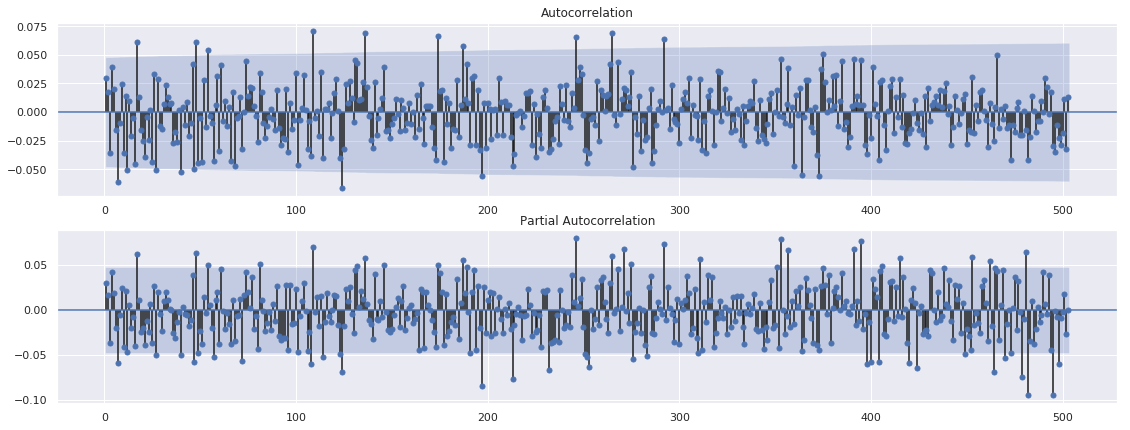

In [28]:
fig = plt.figure(figsize=(19, 7))
ax = fig.add_subplot(211)

plot_acf(differences_price,  lags = range(1,252*2), ax=plt.gca())
ax = fig.add_subplot(212) 
plot_pacf(differences_price, lags = range(1,252*2), ax=plt.gca())
plt.show()

As we could see that, the ACF and PACF peak does not come to same interval. So this stock do not have clearly seasonaly components.

Let's decomposing by frequency of 1 month ,quater or years to checks.

1 Month : 

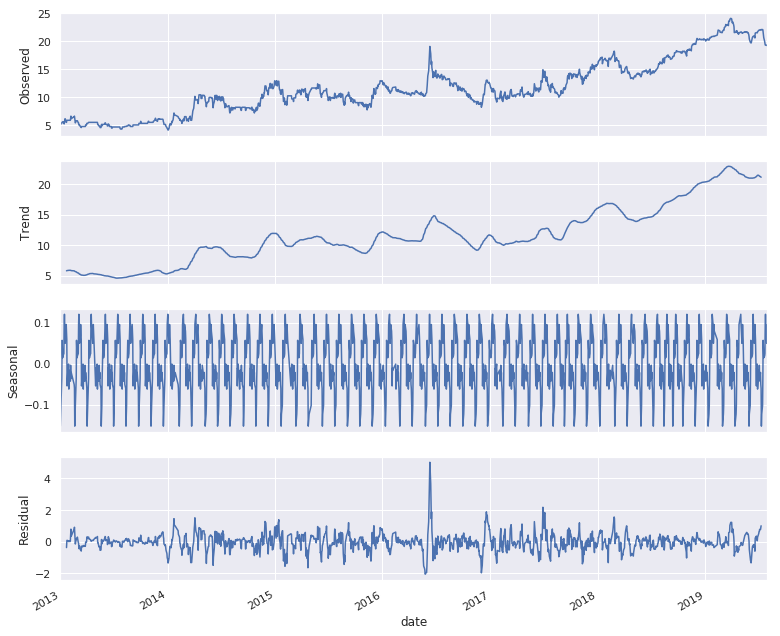

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

_TICKER = 'VNG'

decomposition = seasonal_decompose(daily_close_px[_TICKER].dropna(), model='additive', freq=30)
fig = decomposition.plot()
plt.show()

A quarter 

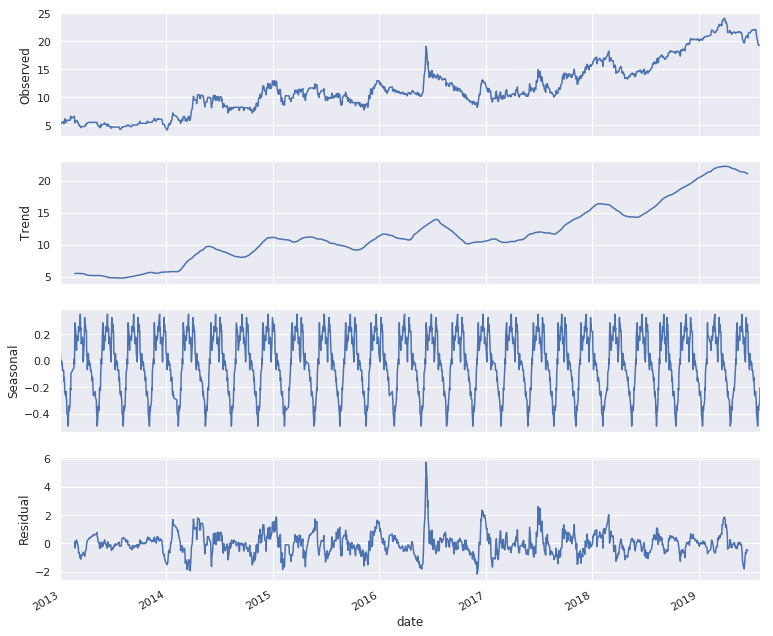

In [30]:
decomposition = seasonal_decompose(daily_close_px[_TICKER].dropna(), model='additive', freq=252//4)
fig = decomposition.plot()
plt.show()

1 Year

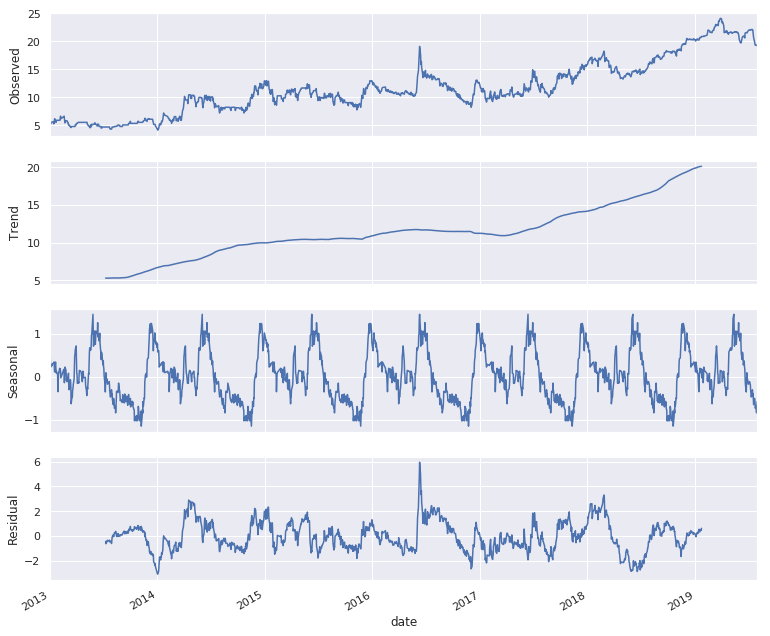

In [31]:
decomposition = seasonal_decompose(daily_close_px[_TICKER].dropna(), model='additive', freq=252)
fig = decomposition.plot()
plt.show()

As we could see that, after decompose, the residuals of stock is not normaly distributed. Thus this stock is not have seasonal components 

#### VNINDEX

In [32]:
_TICKER = 'VNINDEX'

differences_price = daily_close_px[_TICKER].diff().dropna()
count = 1 
while True:
    result = adfuller(differences_price)
    if (result[1] <= 0.05):
        print('Difference times : {}'.format(count))
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        break 
    count += 1 
    differences_price = differences_price.diff()

Difference times : 1
ADF Statistic: -14.319356
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


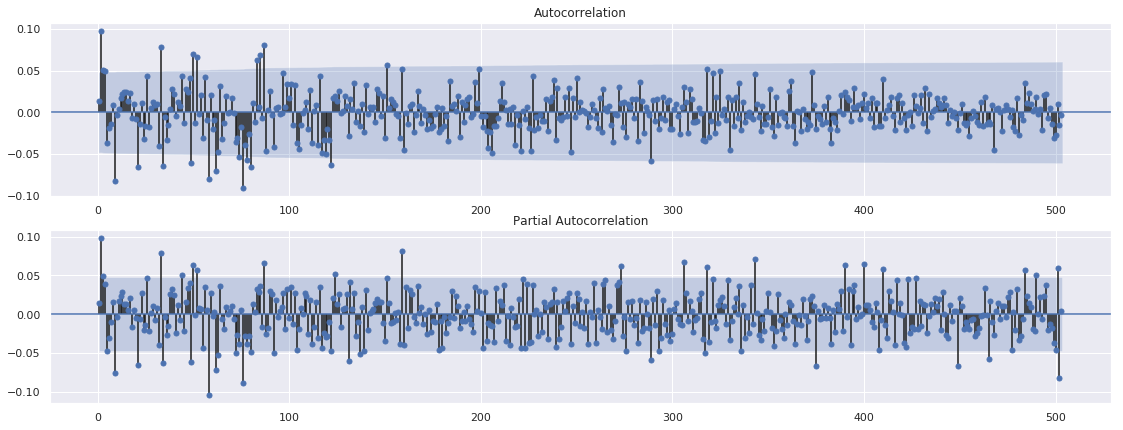

In [33]:
fig = plt.figure(figsize=(19, 7))
ax = fig.add_subplot(211)

plot_acf(differences_price,  lags = range(1,252*2), ax=plt.gca())
ax = fig.add_subplot(212) 
plot_pacf(differences_price, lags = range(1,252*2), ax=plt.gca())
plt.show()

The ACF and PACF of VNINDEX show that there could be having the seasonality. 

1 Month

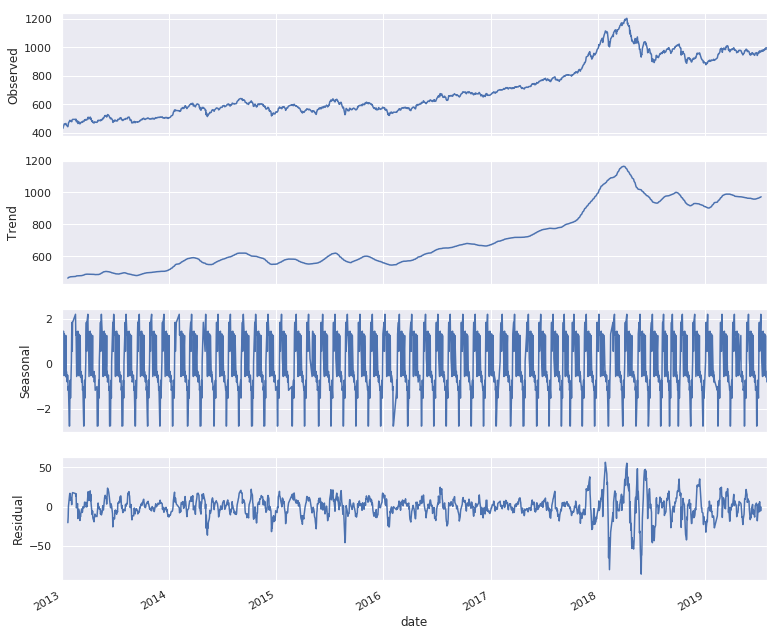

In [34]:
_TICKER = 'VNINDEX'

decomposition = seasonal_decompose(daily_close_px[_TICKER].dropna(), model='additive', freq=30)
fig = decomposition.plot()
plt.show()

A quarter

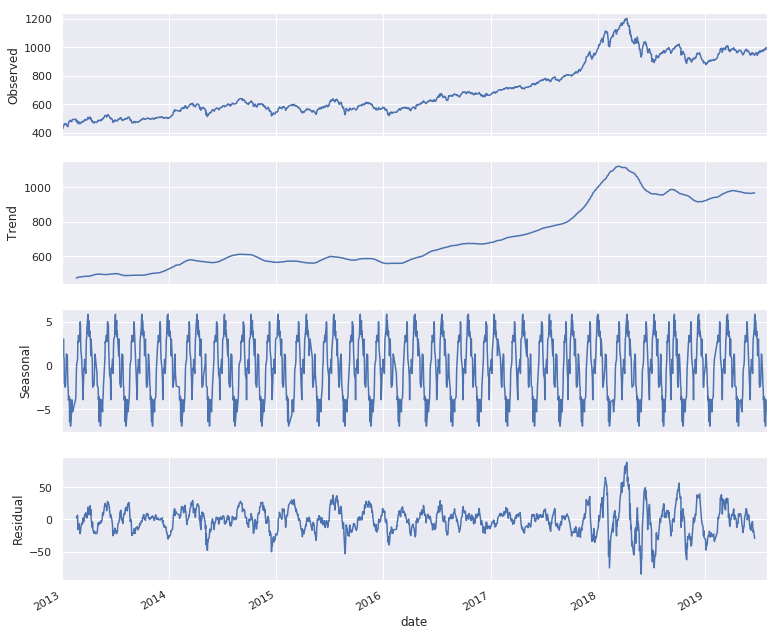

In [35]:
_TICKER = 'VNINDEX'

decomposition = seasonal_decompose(daily_close_px[_TICKER].dropna(), model='additive', freq=252//4)
fig = decomposition.plot()
plt.show()

A Year

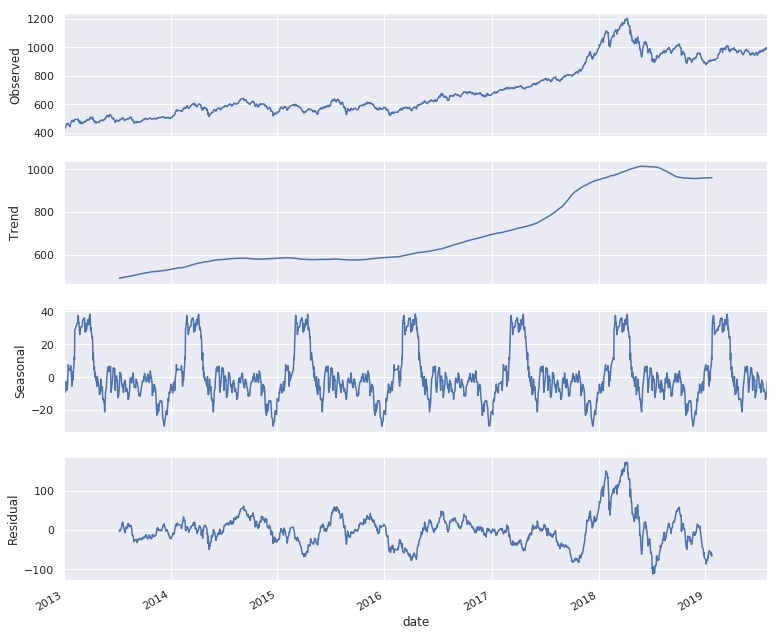

In [36]:
_TICKER = 'VNINDEX'

decomposition = seasonal_decompose(daily_close_px[_TICKER].dropna(), model='additive', freq=252)
fig = decomposition.plot()
plt.show()

As we could see that, The VNINDEX is also not have seasonal properties

### Checking does the chosen tickers is out perform the market

In [0]:
_TICKER =  'VNG'
tickerreturn = daily_return(daily_close_px[_TICKER])

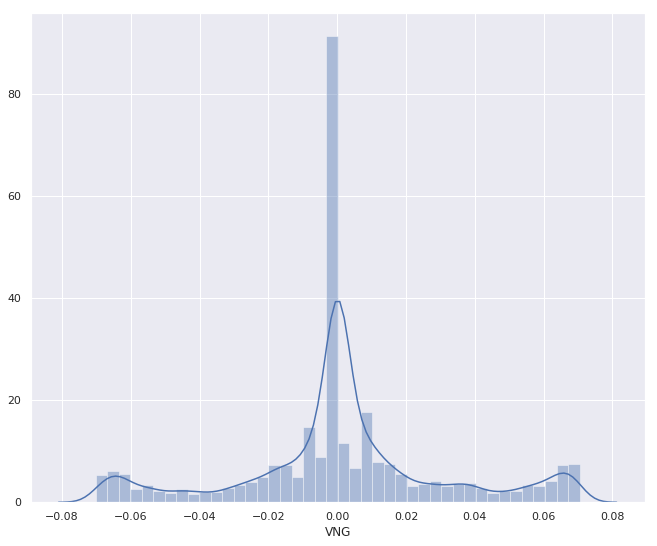

In [38]:
sns.distplot(tickerreturn.dropna());

In [39]:
tickerreturn.mean()

0.0012728838411048696

In [40]:
len(tickerreturn.dropna())

1664

In [0]:
_TICKER = 'VNINDEX'
marketreturn = daily_return(daily_close_px[_TICKER])

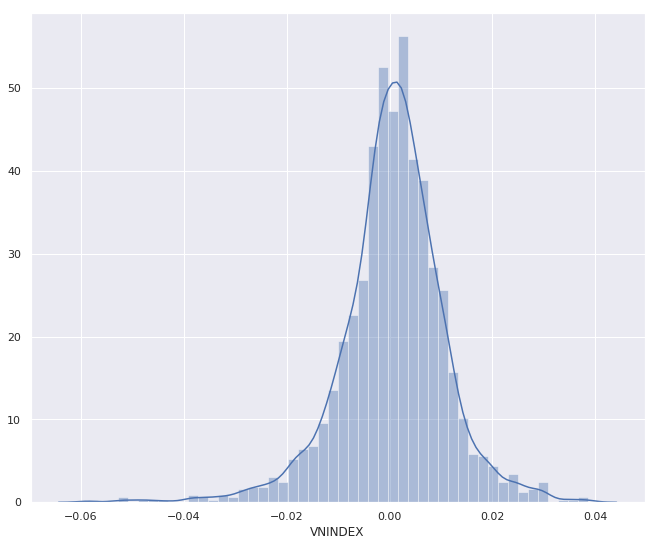

In [42]:
sns.distplot(marketreturn.dropna())

In [43]:
marketreturn.mean()

0.0005708704062341513

In [44]:
len(marketreturn.dropna())

1664

We could see that mean of the market return is lower than the mean ticker returns. To check the significants. we could using the one way ANOVA test.

* $ H_0 : \mu_1 = \mu_2 $  There are no significant differences between the groups' mean returns.
* $ H_1 : \mu_1 \neq \mu_2 $ There is a significant difference between the groups' mean returns.


In [45]:
stats.f_oneway(marketreturn.dropna(),
               tickerreturn.dropna())

F_onewayResult(statistic=0.7809727860198177, pvalue=0.3769076652728197)

The resulting pvalue was larger than 0.05. Then we could not reject the $ H_0 $ . So the difference between VNG and VNINDEX returns is not significantly 

##2. Feature Engineering

The objective of this problems is optimizing the sharpe ratio 
$$
\text { Sharpe Ratio }=\sqrt{n} * \frac{\mathbb{E}\left[R-R_{f}\right]}{\sqrt{\operatorname{var}\left[R-R_{f}\right]}} = \sqrt{252} * \frac{\mathbb{E}\left[R\right]}{\sqrt{\operatorname{var}\left[R\right]}}
$$
where :  
* $ R_f = 0 $ 
* $ n = 252 $.
* R are equally distributed by the returns of N porfolio $ R=\frac{1}{N} \sum {i}^{N} R_{i} $

Therefore the feature that we mainly using is the returns prices of each stocks. 
$$
R_{i}=\frac{P_{i}^{T}}{P_{i}^{t}}-1
$$


In [0]:
daily_return_pr = daily_close_px.apply(daily_return)

In [47]:
daily_return_pr.head()

ticker,AAA,AAM,ABT,ACC,ACL,ADS,AGF,AGM,AGR,AMD,ANV,APC,APG,ASM,ASP,AST,ATG,BBC,BCE,BCG,BFC,BHN,BIC,BID,BMC,BMI,BMP,BRC,BSI,BTP,BTT,BVH,BWE,C32,C47,CAV,CCI,CCL,CDC,CEE,...,VCB,VCF,VCI,VDP,VDS,VFG,VHC,VHG,VHM,VIC,VID,VIP,VIS,VJC,VMD,VN30,VND,VNE,VNG,VNINDEX,VNL,VNM,VNS,VOS,VPB,VPD,VPG,VPH,VPI,VPK,VPS,VRC,VRE,VSC,VSH,VSI,VTB,VTO,YBM,YEG
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,-0.024000,0.000000,0.000000,-0.032448,NaN,0.045802,-0.049964,0.017274,NaN,-0.041667,-0.019563,NaN,-0.021956,-0.018692,NaN,NaN,-0.023984,-0.024324,NaN,NaN,NaN,-0.040665,NaN,-0.031579,0.011136,0.020725,0.009494,0.048780,0.017341,-0.032922,0.049615,NaN,-0.008850,-0.044170,NaN,0.000000,0.051630,-0.037356,NaN,...,0.025391,-0.050016,NaN,NaN,NaN,0.0,0.014774,0.026201,NaN,0.000000,-0.035398,0.000000,-0.046917,NaN,-0.048837,0.001059,NaN,-0.046053,0.035294,0.002199,0.000000,-0.005593,0.023370,0.041667,NaN,NaN,NaN,-0.046154,NaN,-0.046046,NaN,0.020725,NaN,-0.003646,0.000000,-0.027027,-0.012077,-0.022140,NaN,NaN
2013-01-04,NaN,0.000000,-0.004437,-0.003720,0.008130,NaN,0.000000,0.004573,0.018868,NaN,-0.047101,-0.009390,NaN,0.010204,0.000000,NaN,NaN,0.024573,-0.024931,NaN,NaN,NaN,0.028902,NaN,0.019565,-0.011013,0.002175,-0.009404,0.049834,0.045455,0.048511,0.049443,NaN,0.030357,-0.038817,NaN,0.010638,0.046512,0.000000,NaN,...,0.024762,0.039466,NaN,NaN,NaN,0.0,-0.022748,0.000000,NaN,0.000000,0.036697,-0.015974,0.000000,NaN,0.000000,0.014186,NaN,0.000000,0.000000,0.016195,0.024963,0.017170,-0.003606,0.000000,NaN,NaN,NaN,-0.016129,NaN,0.004197,NaN,0.017766,NaN,0.009149,0.000000,-0.040404,0.026895,0.022642,NaN,NaN
2013-01-07,NaN,0.008197,0.000000,-0.003734,0.033266,NaN,-0.047445,0.000000,0.016667,NaN,-0.011407,0.000000,NaN,-0.010101,0.019048,NaN,NaN,-0.011992,0.014205,NaN,NaN,NaN,-0.013109,NaN,-0.017058,0.037862,0.008683,0.045886,-0.025316,0.013587,0.042208,0.049702,NaN,0.013865,-0.032692,NaN,-0.010526,0.022222,0.000000,NaN,...,0.027261,0.000000,NaN,NaN,NaN,0.0,-0.034451,-0.025532,NaN,0.043757,0.035398,0.000000,-0.023910,NaN,0.036675,0.021814,NaN,0.048276,0.035985,0.019082,0.007163,0.000000,-0.042220,0.000000,NaN,NaN,NaN,0.016393,NaN,-0.008359,NaN,0.019950,NaN,0.000000,0.049451,0.042105,0.000000,-0.022140,NaN,NaN
2013-01-08,NaN,0.033424,-0.007130,0.019490,0.031220,NaN,-0.045977,-0.023520,0.000000,NaN,0.011538,0.000000,NaN,0.010204,0.021807,NaN,NaN,0.035738,0.011204,NaN,NaN,NaN,0.026565,NaN,0.021692,0.010730,0.048780,0.000000,0.000000,0.000000,0.026480,0.049322,NaN,0.000000,-0.007952,NaN,-0.010638,-0.043478,0.038806,NaN,...,0.050060,0.012683,NaN,NaN,NaN,0.0,0.048216,-0.030568,NaN,0.012270,0.034188,0.000000,0.012968,NaN,0.000000,0.031777,NaN,0.000000,0.000000,0.029872,-0.031294,0.045693,-0.011335,0.000000,NaN,NaN,NaN,0.000000,NaN,0.011591,NaN,-0.019560,NaN,0.009066,0.045812,0.000000,0.023810,0.000000,NaN,NaN


##3. Model

Considers the normal solution of optimizing the sharpe ratio. We could rewrite the sharpe ratio :
$$
 \text { Sharpe Ratio }= \sqrt{252} * \frac{\mathbb{E}\left[R\right]}{\sqrt{\operatorname{var}\left[R\right]}}  
$$

The maximum Sharpe Ratio is equivalent to the tangency porfolio in Markovik 's Modern Porfolio Theory, we could optain that by solving the mean-variances problems: 
$$
\begin{aligned} \min _{\mathbf{w}} && \frac{1}{2} \mathbf{w}^{T} \boldsymbol{\Sigma} \mathbf{w} \\ \text { subject to } && \mathbf{w}^{T} \hat{\mu}=p \\ \text { and } && \mathbf{w}^{T} \mathbf{1}=1 \end{aligned}
$$
where : 
* $\hat{\mu}$ is the expected return vector of assets in portfolio and $p$ is the expected return of all portfolio
*  $\mathbf{1}$ is the ones vector with length of $w$

The solution of this problem is equivalent to optimize the least square as follow: 
$$
\begin{aligned} \min _{w} &&\frac{1}{T}\left\|p \mathbf{1}_T -R \mathbf{w}\right\|_{2}^{2} \\ \text { subject to } && \mathbf{w}^{T} \hat{\mu}={p} 
\\ \text { and } && \mathbf{w}^{T} \mathbf{1}=1 \end{aligned} 
$$
where: 
* T is the numbers of return prices ( the number of days if using daily returns ) 
* R is the $T \times N$ matrix with $N$ is the number of assets

Because we need to find the best simple average of asset, so we could solve this problem by using the shrinkage methods without short possitions. Therefore,I propose the method by optimize the Non Negative Least Squares: 
$$
\min _{\mathbf{w} \succeq 0} \frac{1}{T}\left\| \tilde{\mu}_N -R \mathbf{w}\right\|_{2}^{2}
$$ 
where: 
* $\tilde{\mu}_N$ is the expected return of N assets in time  $t$ , $0 < t < T$ 




---



In [0]:
def portfolio_optimize(daily_return_pr):
    """
        Calculate the Best 1/N Portfolio

        Parameters
        ----------
        daily_return_pr  :     pandas.DataFrame
            The array of daily return
            
        Returns
        -------
        list_ticker      : list
         List of best tickers
    """

    drop_cols = daily_return_pr.columns[daily_return_pr.isna().any()].tolist()
    X = daily_return_pr.drop(columns= drop_cols)
    X = X.drop(columns= 'VNINDEX')
    y = X.mean(axis = 1).shift(1)

    X = X[1:]
    y = y[1:]
    w,_ = nnls(X,y)
    
    coef = pd.Series(w,index = X.columns)
    list_ticker = coef[coef > 0].index.tolist()
    return list_ticker

## Evaluation

We testing by using the rolling windows. Starting from 2013 , we using 252 next day to finding the portfolio. then we using the rolling windows in 1 month ( 30 days ) to calculate the sharpe ratio. After 252 days , we will re calculate the portfolio. Repeat the procedure until now. 

In [0]:
def sharp_ratio_portfolio(portfolio_daily_return,n = 1):
    """
        Calculate the Sharpe Ratio of portfolio
        
        Parameters
        ----------
        portfolio_daily_return   : pandas.DataFrame
            The array of portfolio daily return 
        n                        : int
            Anual Factor 
        Returns
        -------
        sharpe_ratio     : float
            Sharpe Ratio value of portfolio
    """
    return_portfolio = portfolio_daily_return.mean(axis=1)
    sharpe_ratio = np.sqrt(n) * return_portfolio.mean() / return_portfolio.std()

    return sharpe_ratio

In [0]:
size = 252 + 30
sharpe_ratio_list = []

for i in range(1,len(daily_return_pr) - size + 1) :
    train = daily_return_pr.iloc[i:i+252]
    test  = daily_return_pr.iloc[i+252:i + size ]
    tickers_l = portfolio_optimize(train)
    test = test[tickers_l]
    sharpe_ratio_list.append(sharp_ratio_portfolio(test,252))

2.9649363206578316


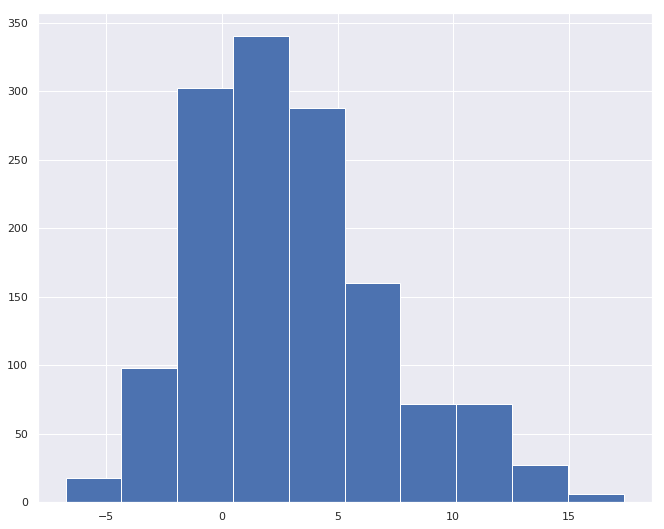

In [51]:
print(np.mean(sharpe_ratio_list))
plt.hist(sharpe_ratio_list)
plt.show()

## Test API 

In [0]:
train = daily_return_pr.loc['2018-07-31':]
tickers_l = portfolio_optimize(train)
result = ",".join(tickers_l).lower()

In [53]:
URL = " http://128.199.65.170:5000/entropy2019"

PARAMS = {'tickers':result}
try: 
    r = requests.get(url = URL, params = PARAMS) 
    data = r.json() 
    print(data)
except: 
    print('Cannot Connect to Servers')

{'id': 'tmpk8vsj2ux', 'sharpe_ratio': '-6.21048678591651'}


Write Result to CSV

In [0]:
df_tickers = pd.DataFrame({'ticker':tickers_l})
df_tickers.to_csv('result.csv',index = False)

# Sections 2: Improve Models

## Filter By SMA 

In [0]:
# Select the Stock path which is lower than sma 
temp = daily_close_px.loc['2018-07-31':]
temp = temp[tickers_l]
filter_tickers = []
for i in temp:
    sma = temp[i].rolling(30).mean()
    if (sma[-1] > temp[i][-1]): 
        filter_tickers.append(i)

## Step 3:  Bayesian Optimization 

In [56]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.0.1-cp36-none-any.whl size=10032 sha256=816f54305c2c3a8f6e2c4afb370d30188a52956b79a46eb1d147540bfd9c7dce
  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [0]:
from bayes_opt import BayesianOptimization

In [0]:
def generate_weight(s,n):
    """
        Generate the weigth array 

        Parameters
        ----------
        s  :     int
            The random generate integer
        n  :     int 
            The length of weight array 

        Returns
        -------
        w      : np.array
            The array of weight 
    """

    w = "{0:b}".format(s).zfill(n)
    w = np.array([ int(i) for i in w])
    return w 

In [0]:
X_train = train[filter_tickers].dropna()
# X_train = train[tickers_l].dropna()
muy = X_train.mean()
covar = X_train.T.dot(X_train)

def optimize_sharpe_ratio(selection,n = len(X_train.columns), muy = muy,covar = covar):
    """
        The negative sharpe ratio functions. This function will be optimize by Bayesian Optimization algorithm.

        Parameters
        ----------
        selection  :     float
            The random generate float, generated by Bayesain Optimization algorithm
        n  :     int 
            The length of weight array 
        muy :   np.array
            The 1xN mean vector of N assets 
        covar : np.array 
            The NxN covariance matrix of N assets 

        Returns
        -------
        neq_sharpe_ratio     : float
            The negative sharpe ratios
    """

    s = int(selection)
    w = generate_weight(s,n)
    neg_sharpe_ratio = - muy.dot(w) / ((w.T.dot(covar.dot(w))) ** 1/2)
    return neg_sharpe_ratio

In [0]:
# Bounded region of parameter space 
# We choosing from 10 assets 
pbounds = {'selection': (0,2**len(X_train.columns) - 1)}

optimizer = BayesianOptimization(
    f = optimize_sharpe_ratio,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1
)

In [61]:
optimizer.maximize(
    init_points=2,
    n_iter=200,
    kappa=5
)

|   iter    |  target   | selection |
-------------------------------------
|  1        |  0.001894 |  5.869e+1 |
|  2        |  0.000394 |  1.014e+1 |
|  3        | -0.000612 |  1.338e+1 |
|  4        | -0.000941 |  7.036e+1 |
|  5        | -0.000464 |  6.673e+1 |
|  6        |  0.000316 |  1.898e+1 |
|  7        |  0.002126 |  2.643e+1 |
|  8        | -0.001946 |  1.068e+1 |
|  9        | -0.001008 |  6.254e+1 |
|  10       | -0.003617 |  2.074e+1 |
|  11       | -0.000577 |  2.257e+1 |
|  12       |  0.001771 |  7.133e+1 |
|  13       |  0.00159  |  1.133e+1 |
|  14       | -0.002146 |  7.844e+1 |
|  15       | -0.001653 |  2.915e+1 |
|  16       | -0.001081 |  9.092e+1 |
|  17       |  0.004032 |  7.945e+1 |
|  18       | -0.000188 |  2.817e+1 |
|  19       |  0.000121 |  1.115e+1 |
|  20       |  0.000622 |  1.365e+1 |
|  21       |  0.000730 |  3.488e+1 |
|  22       | -0.001089 |  5.805e+1 |
|  23       | -0.000728 |  4.882e+1 |
|  24       |  0.00131  |  8.856e+1 |
|  25       

## Test API 

In [0]:
# Get max parameters 
a = optimizer.max['params']['selection']
b = generate_weight(int(a),len(X_train.columns))

In [0]:
# Get equivalent tickers id 
coef = pd.Series(b,index = X_train.columns)
list_ticker = coef[coef > 0].index.tolist()
result = ",".join(list_ticker).lower()

In [64]:
URL = " http://128.199.65.170:5000/entropy2019"

PARAMS = {'tickers':result}
try: 
    r = requests.get(url = URL, params = PARAMS) 
    data = r.json() 
    print(data)
except: 
    print('Cannot Connect to Servers')

{'id': 'tmpbqryn4yi', 'sharpe_ratio': '-7.260531254387632'}


In [65]:
print("Numbers of tickers : {} ".format(len(list_ticker)))
", ".join(list_ticker)

Numbers of tickers : 20 


'ABT, AST, BCE, HII, JVC, KMR, L10, LIX, PGD, ROS, SBV, SFC, SJF, TCL, TDC, TMS, TNT, VCF, VIS, VNE'

## Write to CSV

In [0]:
df_tickers = pd.DataFrame({'ticker':list_ticker})
df_tickers.to_csv('result.csv',index = False)

# Plot 

In [0]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)